#  2015 Fall Term: Web Analytics IS 620
    
## Week Six - Network Analysis: 2-Mode Networks

### Author: Partha Banerjee

Let us start with the given code at

    https://networkx.github.io/documentation/latest/examples/algorithms/davis_club.html.


#### Given code

"""

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""

In [1]:
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by 
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

In [2]:
import string
import networkx as nx
import matplotlib.pyplot as plt

# Little more to add for generating graphs
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names        
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parse matrix         
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

In [4]:
def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.
    
    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.
 
    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G

In [5]:
if __name__ == "__main__":
    # return graph and women and clubs lists
    (G,women,clubs)=davis_club_graph()

    # project bipartite graph onto women nodes
    W=project(G,women)
    # project bipartite graph onto club nodes
    C=project(G,clubs)

    print("Degree distributions of projected graphs")
    print('') 
    print("Member #Friends")
    val_map1={}
    for v in W:
        val_map1[v]=W.degree(v)
        print('%s %d' % (v,W.degree(v)))

    print('') 
    print("Clubs #Members")
    val_map2={}
    for v in C:
        val_map2[v]=C.degree(v)
        print('%s %d' % (v,C.degree(v)))

Degree distributions of projected graphs

Member #Friends
CHARLOTTE 13
FLORA 14
BRENDA 17
MYRNA 18
PEARL 18
EVELYN 19
THERESA 19
FRANCES 17
LAURA 17
VERNE 19
NORA 19
KATHERINE 18
ELEANOR 17
HELEN 19
DOROTHY 18
OLIVIA 14
SYLVIA 19
RUTH 19

Clubs #Members
E11 10
E10 10
E13 10
E12 10
E14 10
E9 15
E8 15
E5 10
E4 10
E7 15
E6 15
E1 10
E3 10
E2 10


#### Let us represent the data through graph

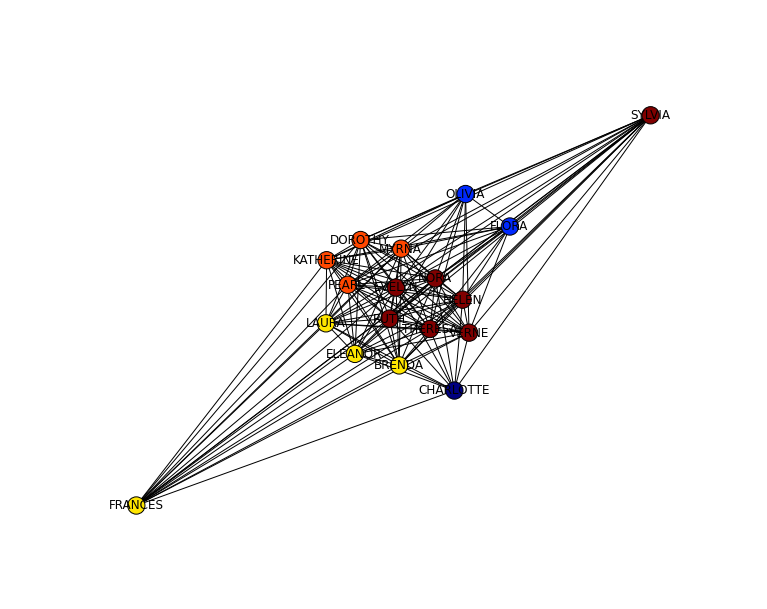

In [6]:
values = [val_map1.get(node) for node in W.nodes()]

pos=nx.spring_layout(W)
nx.draw(W, pos, cmap=plt.get_cmap('jet'), node_color=values)
labels=nx.draw_networkx_labels(W,pos)
plt.show()

#### Now let us find cliques in Women's group

In [7]:
cliques = list(nx.find_cliques(W))
for i in range(len(cliques)):
    print cliques[i]

['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'CHARLOTTE', 'LAURA', 'ELEANOR', 'BRENDA', 'FRANCES']
['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'MYRNA', 'PEARL', 'DOROTHY', 'KATHERINE', 'FLORA', 'OLIVIA']
['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'MYRNA', 'PEARL', 'DOROTHY', 'KATHERINE', 'BRENDA', 'LAURA', 'ELEANOR', 'FRANCES']


#### Now let us see each woman's association with the events.

In [8]:
for w in women:
    cnt=0
    for i in range(len(cliques)):
        if (w in cliques[i]):
            cnt+=1
    print w, cnt

EVELYN 3
LAURA 2
THERESA 3
BRENDA 2
CHARLOTTE 1
FRANCES 2
ELEANOR 2
PEARL 2
RUTH 3
VERNE 3
MYRNA 2
KATHERINE 2
SYLVIA 3
NORA 3
HELEN 3
DOROTHY 2
OLIVIA 1
FLORA 1


#### Let us work on events now.

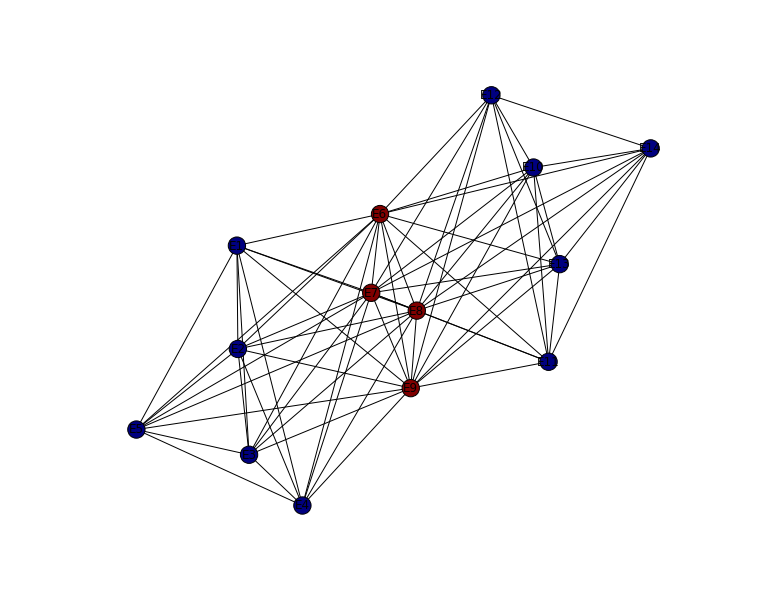

In [9]:
values = [val_map2.get(node) for node in C.nodes()]
pos=nx.spring_layout(C)
nx.draw(C, pos, cmap=plt.get_cmap('jet'), node_color=values)
labels=nx.draw_networkx_labels(C,pos)
plt.show()

In [10]:
ecliques = list(nx.find_cliques(C))
for i in range(len(ecliques)):
    print ecliques[i]

['E9', 'E8', 'E7', 'E6', 'E11', 'E10', 'E13', 'E12', 'E14']
['E9', 'E8', 'E7', 'E6', 'E5', 'E4', 'E1', 'E3', 'E2']


#### Conclusions

Based on the above observations, my conclusion is as follows:

There were two different social circles in the town as evidenced by the event cliques of which four events E6 - E9 were overlapped between the crowds.

The women cliques show that there were 3 different circles of length 12, 13 and 15 from the total 18 ladies. 7 of them attended all events whereas 3 of them attended exclusively her own event clique.

In my opinion, it's not possible to infer who had more influence among them as that group may be either ends of the picture - those who attended all events or those who attended exclusively their own event.